# 301 Regression

View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
* torch: 0.1.11
* matplotlib

In [1]:
import torch 
import torch.nn.functional as F # torch的api，可以用来搭建网络
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)    # reproducible

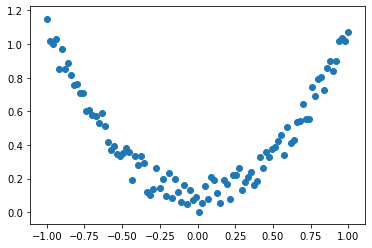

In [3]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1), torch.unsqueeze()用于对数据进行扩充维度
y = x.pow(2) + 0.2*torch.rand(x.size()) #torch.rand()随机生成按(0-1)的均匀分布数据，                  # noisy y data (tensor), shape=(100, 1)

plt.scatter(x.data.numpy(), y.data.numpy()) # 散点图
plt.show()

In [4]:
class Net(torch.nn.Module):   # 创建网络
    def __init__(self, n_feature, n_hidden, n_output):   # 初始化
        super(Net, self).__init__()   # 初始化父类
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer，线性层y=x*w+b
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer,线性层

    def forward(self, x):    # 前向传播
        x = F.relu(self.hidden(x))      # activation function for hidden layer，激活线性层relu(x*w+b)
        x = self.predict(x)             # linear output 线性层输出
        return x

In [6]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network 构造网络
print(net)  # net architecture                      # 

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [7]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)   # 优化器，随机梯度下降， 参数：网络参数、学习率
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss   损失函数，mse

In [8]:
plt.ion()   # something about plotting   # 开启plt的交互模式

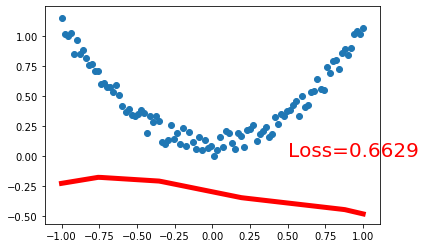

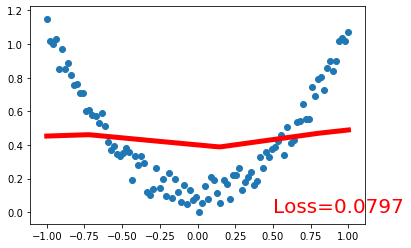

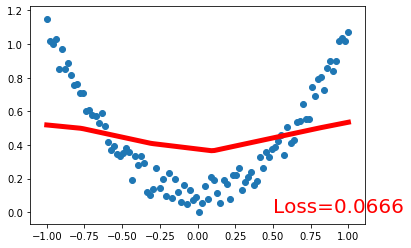

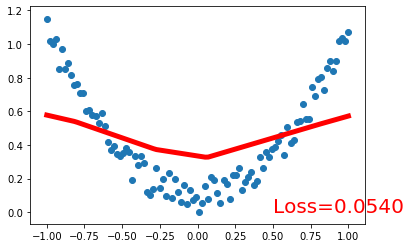

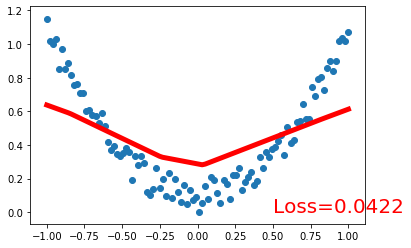

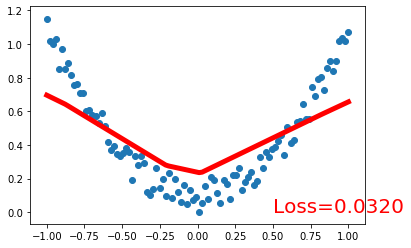

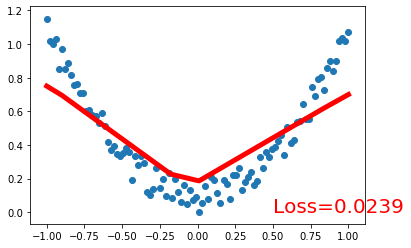

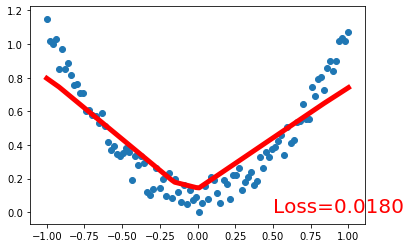

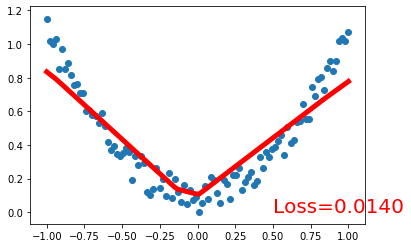

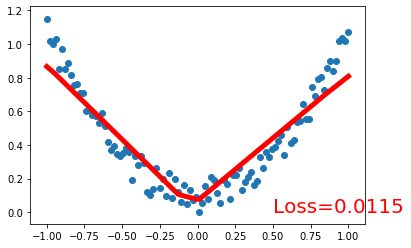

In [9]:
for t in range(100):
    prediction = net(x)     # input x and predict based on x      # 将x通过网络输出

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)   计算损失值

    optimizer.zero_grad()   # clear gradients for next train    将上一轮的梯度置0
    loss.backward()         # backpropagation, compute gradients  反向传播
    optimizer.step()        # apply gradients          更新网络参数

    if t % 10 == 0:      # 每10步
        # plot and show learning process
        plt.cla()        # axis即清除当前图形中的当前活动轴。其他轴不受影响
        plt.scatter(x.data.numpy(), y.data.numpy())  # 画散点图
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)    # 画折线图
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})  #只会在图中添加注释内容而无指向箭头。
        plt.show()
        plt.pause(0.1) # 为图片显示增加动态效果

plt.ioff() # 关闭交互模式
